# Initial data exploration

The objective of this notebook is to explore alternatives of plotting, understand nc data and understand the variables available.


In [4]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [5]:
#Open the data
ds=xr.open_dataset('data/01jan2023.nc')
ds

<xarray.Dataset> Size: 34kB
Dimensions:    (longitude: 64, latitude: 33, time: 2)
Coordinates:
  * longitude  (longitude) float32 256B 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 132B 90.0 84.38 78.75 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 16B 2023-01-01T09:00:00 2023-01-01T21:00:00
Data variables:
    t          (time, latitude, longitude) float64 34kB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-21 18:35:10 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

The file has three dimentions, latitude, longitude and time. We can see the dimentions of longitude are 64 and of latitude 33, but their values cover the whole world. This means the data could be considered a grid of points, where for each point we have two temperature observations, one for each time selected (9:00 and 21:00 of the 01/01/2023)

In [6]:
ds['t'].isel(time=0)

<xarray.DataArray 't' (latitude: 33, longitude: 64)> Size: 17kB
[2112 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 256B 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 132B 90.0 84.38 78.75 ... -78.75 -84.38 -90.0
    time       datetime64[ns] 8B 2023-01-01T09:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

We can confirm this data format by converting it to a dataframe

In [81]:
df = ds.to_dataframe().reset_index()
df.columns = ['longitude', 'latitude', 'time', 'temperature']
df

,longitude,latitude,time,temperature
0,0.000,90.000,2023-01-01 09:00:00,258.276141
1,0.000,90.000,2023-01-01 21:00:00,258.252400
2,0.000,84.375,2023-01-01 09:00:00,260.621813
3,0.000,84.375,2023-01-01 21:00:00,261.624897
4,0.000,78.750,2023-01-01 09:00:00,271.178523
...,...,...,...,...
4219,354.375,-78.750,2023-01-01 21:00:00,251.594063
4220,354.375,-84.375,2023-01-01 09:00:00,251.087180
4221,354.375,-84.375,2023-01-01 21:00:00,250.005749
4222,354.375,-90.000,2023-01-01 09:00:00,255.031850


A data mesh of this tipe can then be plotted in its most basic form as a scatterplot.

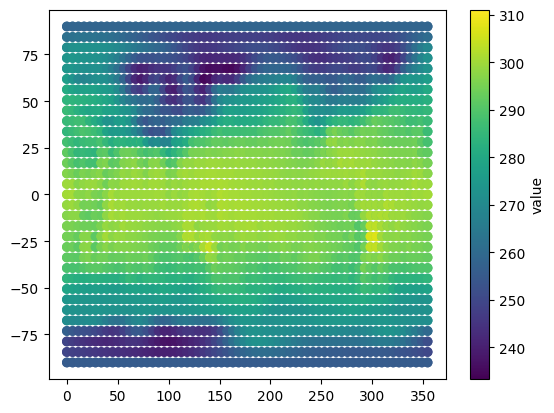

In [83]:
fig, ax = plt.subplots()
sc = ax.scatter(df['longitude'], df['latitude'], c=df['temperature'])
fig.colorbar(sc, label="value")
plt.show()

This kind of plot doesnt allow to understand much what is hapening. Also, longitude start at 0 degrees, basically in the middle of England, cutting Europe by half. This plot does not have a projection (or have a very rudimentary one, we could say), and is in general not usefull.

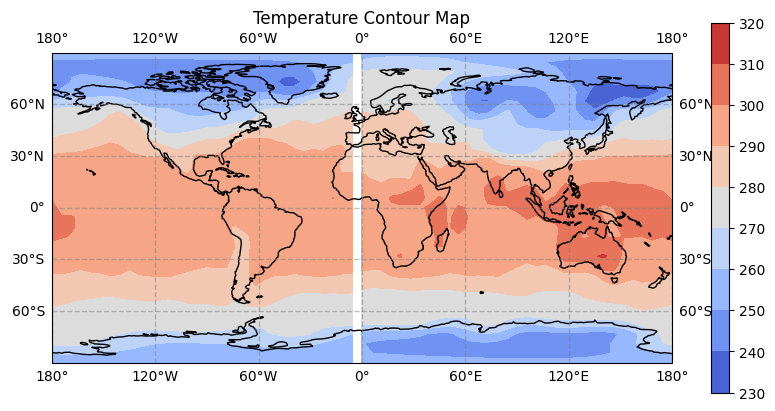

In [12]:
#Correct mapping

#code based on claude 3 opus

data = ds['t'].isel(time=0)

# Create a new figure and axes with a specified projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the data as a contour map
contour = ax.contourf(data.longitude, data.latitude, data, cmap='coolwarm', transform=ccrs.PlateCarree())

# Add coastlines
ax.add_feature(cfeature.COASTLINE)

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# Add a colorbar
cbar = fig.colorbar(contour, ax=ax, shrink=0.6)

# Set the title
ax.set_title('Temperature Contour Map')

# Display the plot
plt.show()

This map uses a PlateCarree projection to visualize the data, and based on the point mesh, creates contours defined by equal temperature, or isolines. This means a interpolation is being made to define where, between the points, the line should be drawn. Also this way allows to conecto to other geographical information, like the coastline. 